In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist, squareform
from sklearn import datasets
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram

warnings.filterwarnings("ignore")

In [2]:
seed=pd.read_csv('/Users/kristinzhang/Desktop/学习资料/2020 spring/sta160/project 1/seed.csv')
seed

,Aera,Perimeter,Compactness,Length,Width,Coefficient,Groove,Wheat
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


In [3]:
#check the missing value, no missing value
seed.isna().any(axis=0)

Aera           False
Perimeter      False
Compactness    False
Length         False
Width          False
Coefficient    False
Groove         False
Wheat          False
dtype: bool

In [4]:
seed.describe()

,Aera,Perimeter,Compactness,Length,Width,Coefficient,Groove,Wheat
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


How to compare multiple labels with respect to one single feature? Each label is attached to a 1-dim dataset of feature measurements. 

In [5]:
class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

A_W=seed.groupby('Wheat')[['Aera']].mean()
P_W=seed.groupby('Wheat')[['Perimeter']].mean()
Co_W=seed.groupby('Wheat')[['Compactness']].mean()
L_W=seed.groupby('Wheat')[['Length']].mean()
Wi_W=seed.groupby('Wheat')[['Width']].mean()
C_W=seed.groupby('Wheat')[['Coefficient']].mean()
G_W=seed.groupby('Wheat')[['Groove']].mean()


A=seed.groupby('Wheat')[['Aera','Perimeter','Compactness','Length']].aggregate(['mean','std','median'])
B=seed.groupby('Wheat')[['Width','Coefficient','Groove']].aggregate(['mean','std','median'])
display('A','B')

A
            Aera                    Perimeter                  Compactness  \
            mean       std  median       mean       std median        mean   
Wheat                                                                        
1      14.334429  1.215704  14.355  14.294286  0.576583  14.32    0.880070   
2      18.334286  1.439496  18.720  16.135714  0.616995  16.21    0.883517   
3      11.873857  0.723004  11.835  13.247857  0.340196  13.25    0.849409   

                            Length                    
            std   median      mean       std  median  
Wheat                                                 
1      0.016191  0.88050  5.508057  0.231508  5.5340  
2      0.015500  0.88260  6.148029  0.268191  6.1485  
3      0.021760  0.84935  5.229514  0.138015  5.2240  

B
          Width                   Coefficient                      Groove  \
           mean       std  median        mean       std  median      mean   
Wheat                                                                       
1      3.244629  0.177616  3.2435    2.667403  1.173901  2.5455  5.087214   
2      3.677414  0.185539  3.6935    3.644800  1.181868  3.6095  6.020600   
3      2.853771  0.147516  2.8345    4.788400  1.336465  4.8390  5.116400   

                         
            std  median  
Wheat                    
1      0.263699  5.0940  
2      0.253934  5.9815  
3      0.162068  5.0915

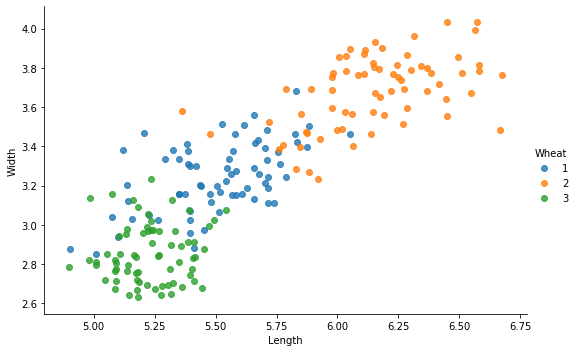

In [6]:
#How the area 'A' is related to the compactness 'C'.
sns.lmplot(x='Length', y='Width', data=seed, hue='Wheat', aspect=1.5, fit_reg=False)

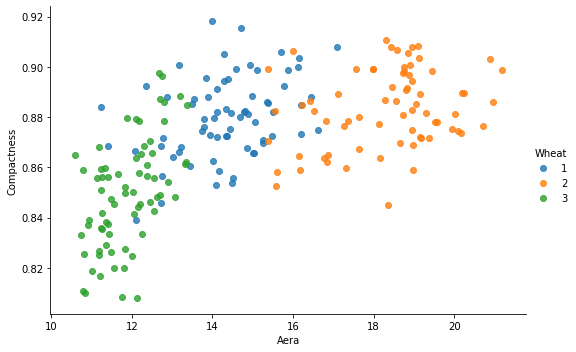

In [7]:
#How the area 'A' is related to the compactness 'C'.
sns.lmplot(x='Aera', y='Compactness', data=seed, hue='Wheat', aspect=1.5, fit_reg=False)

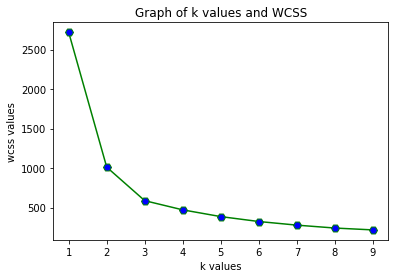

In [8]:
#First I will apply a dendrogram in order to find how many classes do I have in my data.
df = seed.iloc[:,0:7]
wcss = []

for k in range(1,10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
    
# Visualization of k values:

plt.plot(range(1,10), wcss, linestyle ='-', marker = 'H', color = 'g',
         markersize = 8,markerfacecolor = 'b')
plt.title('Graph of k values and WCSS')
plt.xlabel('k values')
plt.ylabel('wcss values')
plt.show()

The following material is based on the material that can be found at 
https://gmarti.gitlab.io/ml/2017/09/07/how-to-sort-distance-matrix.html.

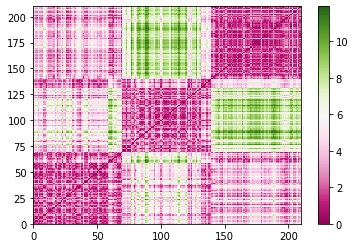

In [9]:
# So now let's have a first look at a heat map of the distance matrix
df1=df.to_numpy()
dft = pd.DataFrame(seed.Wheat)
distances = squareform(pdist(df))

N = len(df)

#plt.pcolormesh(distances, cmap='gist_rainbow')
plt.pcolormesh(distances, cmap='PiYG')
#plt.pcolormesh(distances, cmap='RdBu')

#plt.pcolormesh(distances, cmap='Spectral')
#plt.pcolormesh(distances, cmap='Greys')

plt.colorbar()
plt.xlim([0,N])
plt.ylim([0,N])
plt.show()

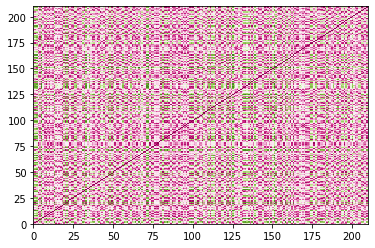

In [10]:
dfX = df1[np.random.permutation(N),:]
distances = squareform(pdist(dfX))

plt.pcolormesh(distances, cmap='PiYG')
plt.xlim([0,N])
plt.ylim([0,N])
plt.show()

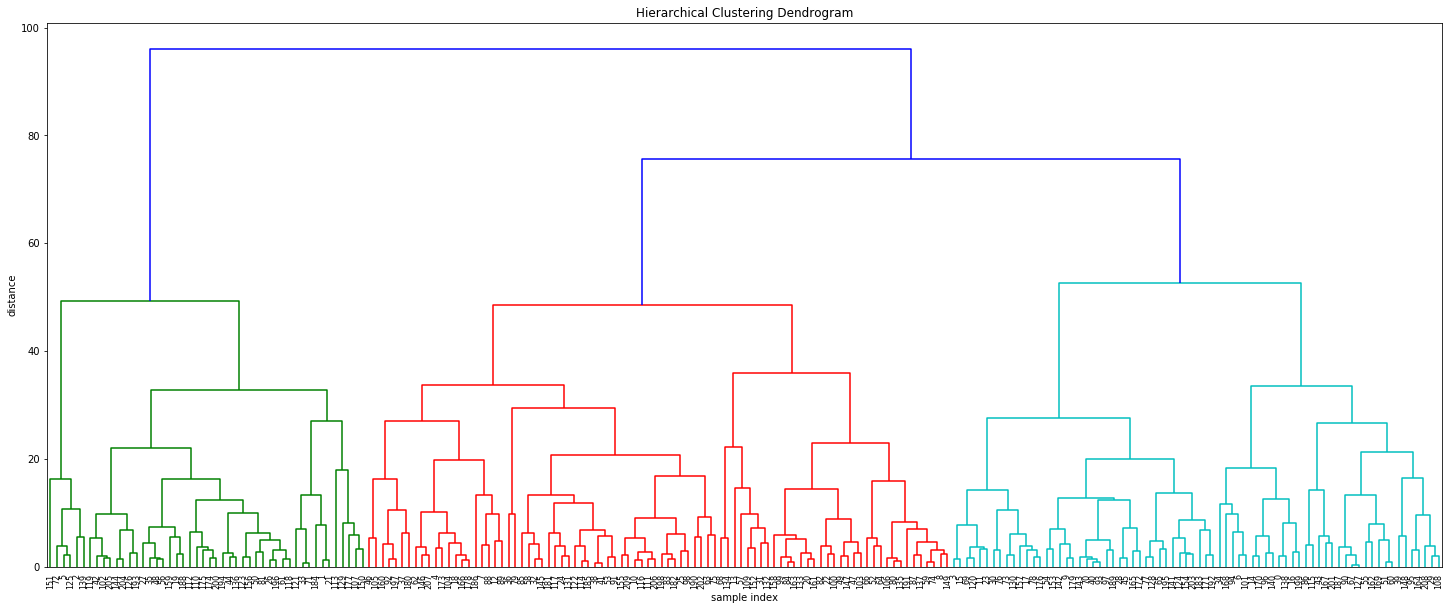

In [11]:
L = linkage(distances, method="complete")
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')

hierarchy.dendrogram(
    L,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

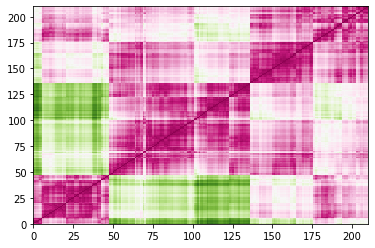

In [12]:
def seriation(Z,N,cur_index):
    '''
        input:
            - Z is a hierarchical tree (dendrogram)
            - N is the number of points given to the clustering process
            - cur_index is the position in the tree for the recursive traversal
        output:
            - order implied by the hierarchical tree Z
            
        seriation computes the order implied by a hierarchical tree (dendrogram)
    '''
    if cur_index < N:
        return [cur_index]
    else:
        left = int(Z[cur_index-N,0])
        right = int(Z[cur_index-N,1])
        return (seriation(Z,N,left) + seriation(Z,N,right))
    
res_order = seriation(L, N, N + N-2)

reordered_dist = np.zeros((N,N))
a,b = np.triu_indices(N,k=1)
reordered_dist[a,b] = distances[ [res_order[i] for i in a], [res_order[j] for j in b]]
reordered_dist[b,a] = reordered_dist[a,b]

plt.pcolormesh(reordered_dist,cmap='PiYG')
plt.xlim([0,N])
plt.ylim([0,N])
plt.show()

In [13]:
def compute_serial_matrix(dist_mat,method="ward"):
    '''
        input:
            - dist_mat is a distance matrix
            - method = ["ward","single","average","complete"]
        output:
            - seriated_dist is the input dist_mat,
              but with re-ordered rows and columns
              according to the seriation, i.e. the
              order implied by the hierarchical tree
            - res_order is the order implied by
              the hierarhical tree
            - res_linkage is the hierarhical tree (dendrogram)
        
        compute_serial_matrix transforms a distance matrix into 
        a sorted distance matrix according to the order implied 
        by the hierarchical tree (dendrogram)
    '''
    N = len(dist_mat)
    flat_dist_mat = squareform(dist_mat)
    res_linkage = linkage(flat_dist_mat, method=method)
    res_order = seriation(res_linkage, N, N + N-2)
    seriated_dist = np.zeros((N,N))
    a,b = np.triu_indices(N,k=1)
    seriated_dist[a,b] = dist_mat[ [res_order[i] for i in a], [res_order[j] for j in b]]
    seriated_dist[b,a] = seriated_dist[a,b]
    
    return seriated_dist, res_order, res_linkage

Method:	 ward


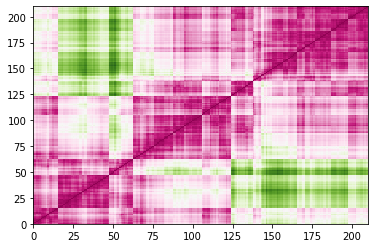

Method:	 single


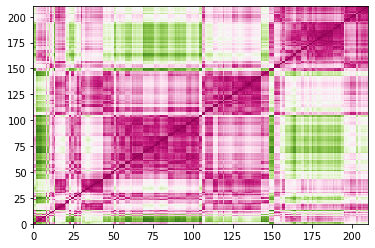

Method:	 average


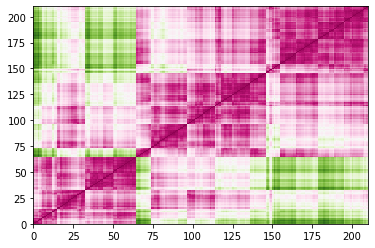

Method:	 complete


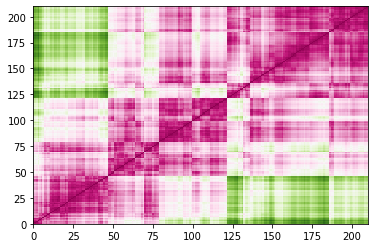

In [14]:
methods = ["ward","single","average","complete"]
for method in methods:
    print("Method:\t",method)
    
    ordered_dist_mat, res_order, res_linkage = compute_serial_matrix(distances,method)
    
    plt.pcolormesh(ordered_dist_mat, cmap = "PiYG")
    plt.show()

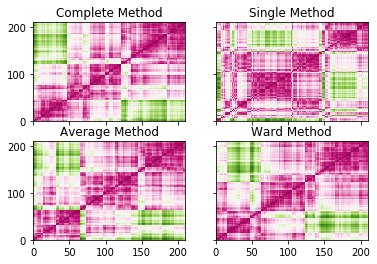

In [15]:
method='complete'
method1='single'
method2='average'
method4='ward'
fig, axs = plt.subplots(2, 2)
ordered_dist_mat, res_order, res_linkage = compute_serial_matrix(distances,method)    
axs[0,0].pcolormesh(ordered_dist_mat, cmap = "PiYG")
axs[0, 0].set_title('Complete Method')
plt.xlim([0,N])
plt.ylim([0,N])

ordered_dist_mat1, res_order, res_linkage = compute_serial_matrix(distances,method1)
axs[0,1].pcolormesh(ordered_dist_mat1, cmap = "PiYG")
axs[0, 1].set_title('Single Method')
plt.xlim([0,N])
plt.ylim([0,N])


ordered_dist_mat2, res_order, res_linkage = compute_serial_matrix(distances,method2)
axs[1,0].pcolormesh(ordered_dist_mat2, cmap = "PiYG")
axs[1,0].set_title('Average Method')
plt.xlim([0,N])
plt.ylim([0,N])

ordered_dist_mat4, res_order, res_linkage = compute_serial_matrix(distances,method4)
axs[1,1].pcolormesh(ordered_dist_mat4, cmap = "PiYG")
axs[1,1].set_title('Ward Method')
plt.xlim([0,N])
plt.ylim([0,N])


# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

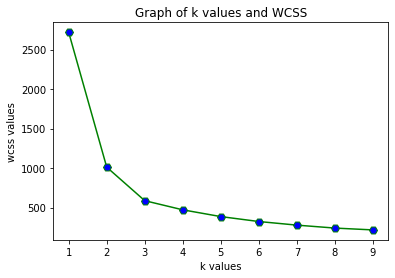

In [16]:
#First I will apply a dendrogram in order to find how many classes do I have in my data.
df = seed.iloc[:,0:7]
wcss = []

for k in range(1,10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
    
# Visualization of k values:

plt.plot(range(1,10), wcss, linestyle ='-', marker = 'H', color = 'g',
         markersize = 8,markerfacecolor = 'b')
plt.title('Graph of k values and WCSS')
plt.xlabel('k values')
plt.ylabel('wcss values')
plt.show()

In [17]:
df2=seed.copy()
from scipy.stats import zscore
df_scaled = df2.apply(zscore)
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 3)
cluster_range = range( 1, 15 )
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 10 )
  clusters.fit(df_scaled)
 # labels = clusters.labels_
 # centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_scaled)
centroids = kmeans.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns = list(df_scaled) )
# Training the model:
clusters = kmeans.fit_predict(df)

# Adding a label feature with the predicted class values:
df_k = seed.copy(deep=True)
df_k['label'] = clusters


Text(0.5, 0.92, '3D plot of KMeans Clustering')

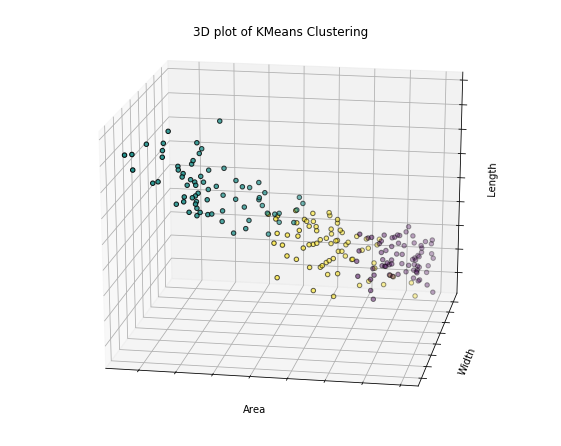

In [18]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=100)
kmeans.fit(df_scaled)
labels = kmeans.labels_
ax.scatter(df_scaled.iloc[:, 0], df_scaled.iloc[:, 4], df_scaled.iloc[:, 3],c=labels.astype(np.float), edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Area')
ax.set_ylabel('Width')
ax.set_zlabel('Length')
ax.set_title('3D plot of KMeans Clustering')

In [19]:
from sklearn.cluster import AgglomerativeClustering

hie_clus = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster2 = hie_clus.fit_predict(df)

df_h = seed.copy(deep=True)
df_h['label'] = cluster2

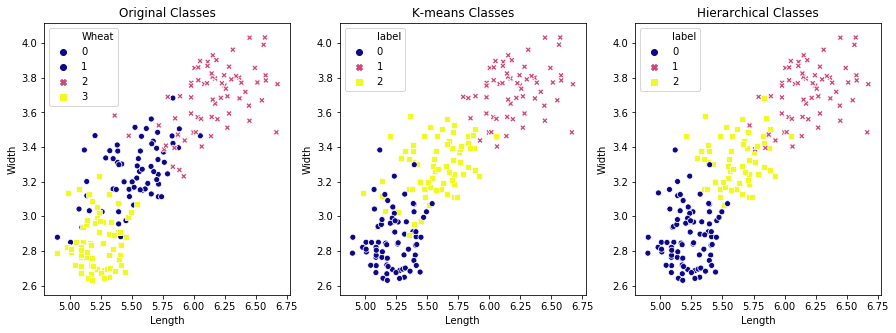

In [20]:
#For visualization I will use only two features (area and perimeter) for the original and predicted datasets. 
#Different classes will have seperate color and styles.
plt.figure(figsize=(15,5))
ax1 = plt.subplot(1,3,1)
plt.title('Original Classes')
sns.scatterplot(x='Length', y='Width', hue='Wheat', style='Wheat', palette='plasma',data=seed, ax=ax1)

ax2 = plt.subplot(1,3,2)
plt.title('K-means Classes')
sns.scatterplot(x='Length', y='Width', hue='label', style='label', palette='plasma',data=df_k, ax=ax2)

ax3 = plt.subplot(1,3,3)
plt.title('Hierarchical Classes')
sns.scatterplot(x='Length', y='Width', hue='label', style='label', palette='plasma',data=df_h, ax=ax3)

plt.show()


In [21]:
print('Original Data Classes:')
print(seed.Wheat.value_counts())
print('-' * 30)
print('K-Means Predicted Data Classes:')
print(df_k.label.value_counts())
print('-' * 30)
print('Hierarchical Predicted Data Classes:')
print(df_h.label.value_counts())

Original Data Classes:
3    70
2    70
1    70
Name: Wheat, dtype: int64
------------------------------
K-Means Predicted Data Classes:
0    77
2    72
1    61
Name: label, dtype: int64
------------------------------
Hierarchical Predicted Data Classes:
0    86
1    63
2    61
Name: label, dtype: int64
